# Introduction: Interactive Visualizations with ipywidgets

nteractive visualizations allow you to dynamically explore datasets, identify patterns, and gain insights without re-running static plots. In this tutorial, you will learn to create an interactive dashboard using ipywidgets and matplotlib/seaborn. By combining widgets like sliders and dropdowns with visualization functions, you can control parameters such as data ranges, variables, and plot styles.

By the end, you will:

* Build reusable visualization functions for histograms, scatter plots, boxplots, and line plots.
* Use ipywidgets to add interactivity to your visualizations.
* Create a complete dashboard to explore the mpg dataset interactively.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, Dropdown, IntRangeSlider
from IPython.display import display, clear_output

# Load our dataset
df = sns.load_dataset("mpg")

## Creating a Dashboard

Dashboards combine multiple visualizations into a single view, enabling a holistic understanding of the dataset. We will integrate our reusable plotting functions into a cohesive dashboard layout using matplotlib’s grid system.


Testing our dashboard:


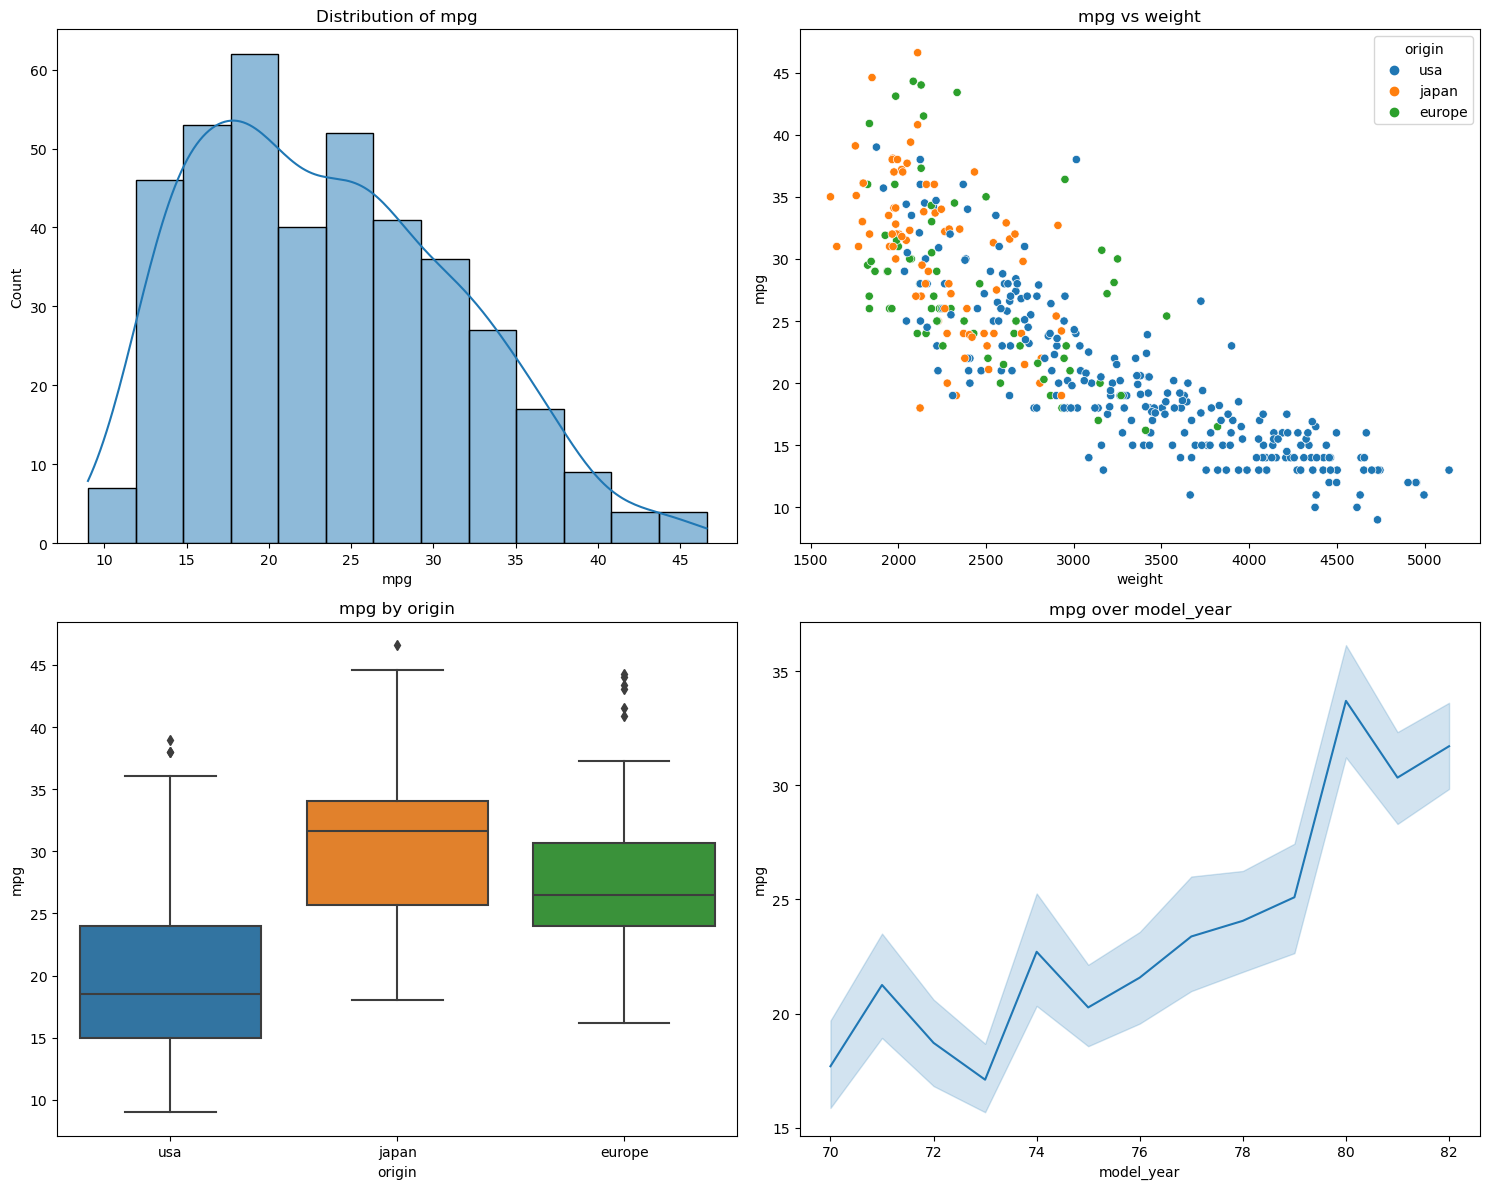

In [4]:
def create_dashboard(data, hist_col='mpg', scatter_x='weight', scatter_y='mpg',
                    box_x='origin', box_y='mpg', line_x='model_year', line_y='mpg'):
    """
    Creates a dashboard combining all our plot types.

    Parameters:
    -----------
    data : pandas DataFrame
        The input dataset
    hist_col : str
        Column for histogram
    scatter_x, scatter_y : str
        Columns for scatter plot
    box_x, box_y : str
        Columns for box plot
    line_x, line_y : str
        Columns for line plot
    """
    fig = plt.figure(figsize=(15, 12))
    gs = fig.add_gridspec(2, 2)

    # Histogram
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(data=data, x=hist_col, kde=True, ax=ax1)
    ax1.set_title(f'Distribution of {hist_col}')

    # Scatter plot
    ax2 = fig.add_subplot(gs[0, 1])
    sns.scatterplot(data=data, x=scatter_x, y=scatter_y, hue='origin', ax=ax2)
    ax2.set_title(f'{scatter_y} vs {scatter_x}')

    # Box plot
    ax3 = fig.add_subplot(gs[1, 0])
    sns.boxplot(data=data, x=box_x, y=box_y, ax=ax3)
    ax3.set_title(f'{box_y} by {box_x}')

    # Line plot
    ax4 = fig.add_subplot(gs[1, 1])
    sns.lineplot(data=data, x=line_x, y=line_y, ax=ax4)
    ax4.set_title(f'{line_y} over {line_x}')

    plt.tight_layout()
    return fig

print("\nTesting our dashboard:")
create_dashboard(df)
plt.show()

Take a moment to review the dashboard.
* Are there any trends in the mpg distribution by region (origin)?
* Does weight influence mpg in the scatter plot?

Reflection Point:
What other variables would you include to make the dashboard more informative?

## Part 3: Adding Interactivity

Now let's make our dashboard interactive using ipywidgets.
We'll explore different types of widgets and how they can control our visualizations.

### Understanding ipywidgets Syntax

Before we implement our interactive dashboard, let's understand how ipywidgets work:

1. Basic Widget Creation:
   All widgets follow a similar construction pattern:
   ```python
   widget = WidgetType(
       value=initial_value,      # Current value of the widget
       options=possible_values,   # For widgets with choices
       description='Label:',      # Label shown next to widget
       style={'description_width': 'initial'}  # Styling options
   )
   ```

2. Common Widget Types and Their Syntax:

   a) Dropdown:
   ```python
   dropdown = Dropdown(
       options=['option1', 'option2', 'option3'],  # List of choices
       value='option1',                           # Default selection
       description='Choose:'                      # Label
   )
   ```
   
   b) IntSlider/FloatSlider:
   ```python
   slider = IntSlider(
       value=50,              # Default value
       min=0,                 # Minimum value
       max=100,               # Maximum value
       step=5,                # Step size
       description='Amount:'  # Label
   )
   ```

3. Using interact() Decorator:
   ```python
   @interact(x=True, y='Hello')  # Creates Checkbox and Text widgets
   def show(x, y):
       print(x, y)
   ```

4. Handling Widget Events:
   ```python
   def on_value_change(change):
       print(f"Changed from {change['old']} to {change['new']}")
   
   widget.observe(on_value_change, 'value')
   ```

In [9]:
def create_interactive_dashboard():
    """Creates an interactive dashboard with widgets for controlling the display."""

    # First, let's explore widget creation and understand the syntax

    # Get numeric and categorical columns for our dropdown options
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=[object]).columns.tolist()

    # Create a dropdown widget
    # - options: list of possible choices
    # - value: default/initial selection
    # - description: label shown next to widget
    # - style: dictionary of CSS-like styling options
    hist_dropdown = Dropdown(
        options=numeric_cols,        # List of numeric columns
        value='mpg',                 # Default selection
        description='Histogram:',     # Widget label
        style={'description_width': 'initial'}  # Make label width dynamic
    )

    scatter_x = Dropdown(
        options=numeric_cols,
        value='weight',
        description='Scatter X:',
        style={'description_width': 'initial'}
    )

    scatter_y = Dropdown(
        options=numeric_cols,
        value='mpg',
        description='Scatter Y:',
        style={'description_width': 'initial'}
    )

    # Create a range slider for year selection
    # IntRangeSlider provides two handles for selecting a range
    year_range = IntRangeSlider(
        value=[70, 82],             # Default range
        min=70,                     # Minimum value
        max=82,                     # Maximum value
        step=1,                     # Step size
        description='Years:',        # Widget label
        continuous_update=False,     # Only update when user releases slider
        style={'description_width': 'initial'}
    )

    # The update function that will be called whenever a widget value changes
    # This function must accept parameters matching the widget names we'll use with @interact
    def update(hist_col, scatter_x_col, scatter_y_col, year_range):
        """
        Update function for our interactive dashboard.

        Parameters match the widget names we use with @interact below.
        Each parameter will receive the current value of its corresponding widget:
        - hist_col: string from hist_dropdown
        - scatter_x_col: string from scatter_x dropdown
        - scatter_y_col: string from scatter_y dropdown
        - year_range: tuple of (min, max) from year_range slider
        """
        # Filter data by year range
        # year_range is a tuple of (min, max) from the IntRangeSlider
        filtered_df = df[
            (df['model_year'] >= year_range[0]) &
            (df['model_year'] <= year_range[1])
        ]

        # Clear previous output to avoid memory issues
        clear_output(wait=True)

        # Create and display the dashboard with current widget values
        fig = create_dashboard(
            filtered_df,
            hist_col=hist_col,          # Current histogram column selection
            scatter_x=scatter_x_col,     # Current scatter x-axis selection
            scatter_y=scatter_y_col      # Current scatter y-axis selection
        )
        plt.show()

    # Connect widgets to the update function using interact

    # Method 1: Pass widget instances directly
    # - Each parameter name must match the function parameter names
    # - The widget instances we created above are passed as values
    interact(
        update,                    # Function to call when widgets change
        hist_col=hist_dropdown,    # Maps hist_col parameter to hist_dropdown widget
        scatter_x_col=scatter_x,   # Maps scatter_x_col parameter to scatter_x widget
        scatter_y_col=scatter_y,   # Maps scatter_y_col parameter to scatter_y widget
        year_range=year_range      # Maps year_range parameter to year_range widget
    )
    
# Create and display our interactive dashboard
create_interactive_dashboard()

interactive(children=(Dropdown(description='Histogram:', options=('mpg', 'cylinders', 'displacement', 'horsepo…

### Key Interactive Visualization Concepts

Here are some important concepts to remember when building interactive visualizations:

1. Widget Selection:
   - Choose widgets that match your data type
   - Consider the user experience
   - Use appropriate ranges and step sizes

2. Layout:
   - Group related widgets together
   - Provide clear labels and descriptions
   - Consider the visual hierarchy

3. Performance:
   - Use continuous_update=False for better performance
   - Clear previous outputs to avoid memory issues
   - Consider data size when updating plots

4. User Experience:
   - Provide meaningful defaults
   - Add descriptive labels
   - Include helpful tooltips or instructions

5. Data Flow:
   - Keep track of widget state
   - Update all relevant plots when widgets change
   - Handle invalid selections gracefully
   
   
### Next Steps:

There are several other widgets available in the ipywidgets library -- this was just a taste. Additionally, there are many other dashboards options available. We've introduced several other libraries in the Intro to Dashboards video. We've also shared a few tutorials here that can be used to explore some other libraries on your local computer. Unfortunately they won't work on the jupyterlite environment of this course. You are welcome to explore those libraries for your W3 and W4 assignments, but you can also do perfectly good assignments using the ipywidgets we've shown here.

In [8]:
#